## Assignment : 14

<pre>
1. Preprocess all the Data we have in DonorsChoose <a href='https://drive.google.com/drive/folders/1MIwK7BQMev8f5CbDDVNLPaFGB32pFN60'>Dataset</a> use train.csv
2. Combine 4 essay's into one column named - 'preprocessed_essays'. 
3. After step 2 you have to train 3 types of models as discussed below. 
4. For all the model use <a href='https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics'>'auc'</a> as a metric. check <a href='https://datascience.stackexchange.com/a/20192'>this</a> for using auc as a metric 
5. You are free to choose any number of layers/hiddden units but you have to use same type of architectures shown below. 
6. You can use any one of the optimizers and choice of Learning rate and momentum, resources: <a href='http://cs231n.github.io/neural-networks-3/'>cs231n class notes</a>, <a href='https://www.youtube.com/watch?v=hd_KFJ5ktUc'>cs231n class video</a>. 
7. For all the model's use <a href='https://www.youtube.com/watch?v=2U6Jl7oqRkM'>TensorBoard</a> and plot the Metric value and Loss with epoch. While submitting, take a screenshot of plots and include those images in .ipynb notebook and PDF. 
8. Use Categorical Cross Entropy as Loss to minimize.
</pre>

### Model-1

Build and Train deep neural network as shown below

<img src='https://i.imgur.com/w395Yk9.png'>
ref: https://i.imgur.com/w395Yk9.png

- __Input_seq_total_text_data__ --- You have to give Total text data columns. After this use the Embedding layer to get word vectors. Use given predefined glove word vectors, don't train any word vectors. After this use LSTM and get the LSTM output and Flatten that output. 
- __Input_school_state__ --- Give 'school_state' column as input to embedding layer and Train the Keras Embedding layer. 
- __Project_grade_category__  --- Give 'project_grade_category' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_categories__ --- Give 'input_clean_categories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_clean_subcategories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_teacher_prefix' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_remaining_teacher_number_of_previously_posted_projects._resource_summary_contains_numerical_digits._price._quantity__ ---concatenate remaining columns and add a Dense layer after that. 



- For LSTM, you can choose your sequence padding methods on your own or you can train your LSTM without padding, there is no restriction on that.

Below is an example of embedding layer for a categorical columns. In below code all are dummy values, we gave only for referance. 

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm_notebook as tqdm1
from tqdm import tqdm
import time
import os

#from plotly import plotly
#import plotly.offline as offline
#import plotly.graph_objs as go
#offline.init_notebook_mode()
from collections import Counter

from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding 
from keras.layers import Input,LSTM, Dropout, BatchNormalization, Dense, concatenate, Flatten, Conv1D, MaxPool1D, LeakyReLU, ELU, SpatialDropout1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer, one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, load_model
from keras import regularizers
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


data=pd.read_csv('preprocessed_train_data.csv',delimiter = ',',nrows=50000, encoding='latin-1')
data.head(5)

In [ ]:
#data=pd.read_csv('/content/drive/My Drive/Donors_choose/preprocessed_train_data.csv',delimiter = ',',nrows=50000, encoding='latin-1')
data=pd.read_csv('/content/drive/My Drive/Donors_choose/preprocessed_train_data.csv',delimiter = ',', encoding='latin-1')
print(data.shape[0])
data.head(5)
#data.dropna(axis=0,how='any',inplace=True)
data.fillna('Mr.',inplace=True)
print(data.shape[0])
#data=data[:500000]
y = data['project_is_approved'].values
data.drop(['project_is_approved'], axis=1, inplace=True)

X = data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.3, stratify=y_train)

109248
109248


In [ ]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'teacher_id', 'Date',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'preprocessed_essay',
       'preprocessed_project_title', 'clean_school_state',
       'clean_teacher_prefix', 'clean_project_grade_category', 'price',
       'quantity'],
      dtype='object')

In [ ]:
data.clean_teacher_prefix.unique()

array(['Mrs.', 'Ms.', 'Mr.', 'Teacher', 'Dr.'], dtype=object)

In [ ]:
print(data.shape[0])

109248


In [ ]:
pd.set_option('max_columns',None)
print(data.head())

   Unnamed: 0  Unnamed: 0.1       id                        teacher_id  \
0           0          8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5   
1           1         37728  p043609  3f60494c61921b3b43ab61bdde2904df   
2           2         74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73   
3           3        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3   
4           4         33679  p137682  06f6e62e17de34fcf81020c77549e1d5   

                  Date                                    project_essay_1  \
0  2016-04-27 00:27:36  I have been fortunate enough to use the Fairy ...   
1  2016-04-27 00:31:25  Imagine being 8-9 years old. You're in your th...   
2  2016-04-27 00:46:53  Having a class of 24 students comes with diver...   
3  2016-04-27 00:53:00  I recently read an article about giving studen...   
4  2016-04-27 01:05:25  My students crave challenge, they eat obstacle...   

                                     project_essay_2  \
0  My students come from a variety o

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding 

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train["preprocessed_essay"].tolist())
tok_train = tokenizer.texts_to_sequences(X_train["preprocessed_essay"])
tok_test = tokenizer.texts_to_sequences(X_test["preprocessed_essay"])

In [ ]:
X_essay_pad_train = pad_sequences(tok_train,maxlen=800,padding='post', truncating='post')
X_essay_pad_test = pad_sequences(tok_test, maxlen=800,padding='post', truncating='post')

In [ ]:
pickle_in = open("/content/drive/My Drive/Donors_choose/Assignments_DonorsChoose_2018/glove_vectors","rb")
glove_words = pickle.load(pickle_in)

In [ ]:
from numpy import zeros
embedding_mat = zeros((len(tokenizer.word_index) + 1, 300))
for word, i in tokenizer.word_index.items():
    vector = glove_words.get(word)
    if vector is not None:
        embedding_mat[i] = vector

In [ ]:
import tensorflow as tf

embedding_layer = Embedding(len(tokenizer.word_index) + 1,300,weights=[embedding_mat],input_length=800,trainable=False)
essay = Input(shape=(800,),name="essay")
x = embedding_layer(essay)
x = LSTM(100,recurrent_dropout=0.5,kernel_regularizer=regularizers.l2(0.001),return_sequences=True)(x)
essay_pre = Flatten()(x)

In [ ]:
from sklearn.preprocessing import LabelEncoder

unique_prefix  = X_train["clean_teacher_prefix"].nunique()
embed_size_prefix = int(min(np.ceil((unique_prefix)/2), 50 ))

input_prefix = Input(shape=(1,),name="clean_teacher_prefix")
embed_prefix = Embedding(unique_prefix,embed_size_prefix,trainable=True)(input_prefix)
flat_prefix = Flatten()(embed_prefix)
lab_enc = LabelEncoder()
enc_prefix_train = lab_enc.fit_transform(X_train["clean_teacher_prefix"])
X_test["clean_teacher_prefix"] = X_test["clean_teacher_prefix"].map(lambda i: ' ' if i not in lab_enc.classes_ else i)
lab_enc.classes_ = np.append(lab_enc.classes_, ' ')
enc_prefix_test = lab_enc.transform(X_test["clean_teacher_prefix"])

In [ ]:
unique_state  = X_train["clean_school_state"].nunique()
embed_size_sc= int(min(np.ceil((unique_state)/2), 50 ))

input_sc = Input(shape=(1,),name="clean_school_state")
embed_sc = Embedding(unique_state,embed_size_sc,name="emb_state",trainable=True)(input_sc)
flat_sc = Flatten()(embed_sc)
enc_sc_train = lab_enc.fit_transform(X_train["clean_school_state"])
enc_sc_test = lab_enc.transform(X_test["clean_school_state"])

In [ ]:
unique_grade  = X_train["clean_project_grade_category"].nunique()
embed_size_grade = int(min(np.ceil((unique_grade)/2), 50 ))

input_grade= Input(shape=(1,),name="grade")
embed_grade = Embedding(unique_grade,embed_size_grade,name="emb_grade",trainable=True)(input_grade)
flat_grade = Flatten()(embed_grade)
enc_grade_train = lab_enc.fit_transform(X_train["clean_project_grade_category"])
enc_grade_test = lab_enc.transform(X_test["clean_project_grade_category"])

In [ ]:
unique_cat  = X_train["clean_categories"].nunique()
embed_size_cat = int(min(np.ceil((unique_cat)/2), 50 ))

input_cat= Input(shape=(1,),name="cat")
embed_cat = Embedding(unique_cat+1,embed_size_cat,name="emb_cat",trainable=True)(input_cat)
flat_cat = Flatten()(embed_cat)
lab_enc = LabelEncoder()
enc_cat_train = lab_enc.fit_transform(X_train["clean_categories"])
X_test["clean_categories"] = X_test["clean_categories"].map(lambda i: ' ' if i not in lab_enc.classes_ else i)
lab_enc.classes_ = np.append(lab_enc.classes_, ' ')
enc_cat_test= lab_enc.transform(X_test["clean_categories"])

In [ ]:
unique_subcat  = X_train["clean_subcategories"].nunique()
embed_size_subcat = int(min(np.ceil((unique_subcat)/2), 50 ))

input_subcat= Input(shape=(1,),name="sub_cat")
embedding_subcat = Embedding(unique_subcat+1,embed_size_subcat,name="emb_subcat",trainable=True)(input_subcat)
flat_subcat = Flatten()(embedding_subcat)
lab_enc = LabelEncoder()
enc_subcat_train = lab_enc.fit_transform(X_train["clean_subcategories"])
X_test["clean_subcategories"] = X_test["clean_subcategories"].map(lambda i: ' ' if i not in lab_enc.classes_ else i)
lab_enc.classes_ = np.append(lab_enc.classes_, ' ')
enc_subcat_test= lab_enc.transform(X_test["clean_subcategories"])

In [ ]:
price_train=X_train['price'].values.reshape(-1, 1)
quantity_train=X_train['quantity'].values.reshape(-1, 1)
projects_train=X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1)
price_test=X_test['price'].values.reshape(-1, 1)
quantity_test=X_test['quantity'].values.reshape(-1, 1)
projects_test=X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1)
X_num_train=np.concatenate((price_train,quantity_train,projects_train),axis=1)
X_num_test=np.concatenate((price_test,quantity_test,projects_test),axis=1)

from sklearn.preprocessing import StandardScaler
normal=StandardScaler()
X_num_train=normal.fit_transform(X_num_train)
X_num_test=normal.transform(X_num_test)

In [ ]:
numerical_feats = Input(shape=(3,),name="numerical_features")
numerical_feat = Dense(100,activation="relu",kernel_initializer="he_normal",kernel_regularizer=regularizers.l2(0.001))(numerical_feats)

In [ ]:
x = concatenate([essay_pre,flat_prefix,flat_sc,flat_grade,flat_cat,flat_subcat,numerical_feat])#
x = Dense(128,activation="relu", kernel_initializer="he_normal",kernel_regularizer=regularizers.l2(0.001))(x)
x=Dropout(0.5)(x)
x = Dense(256,activation="relu",kernel_initializer="he_normal",kernel_regularizer=regularizers.l2(0.001))(x)
x=Dropout(0.5)(x)
x = Dense(64,activation="relu", kernel_initializer="he_normal",kernel_regularizer=regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
output = Dense(2, activation='softmax', name='output')(x)
model = Model(inputs=[essay,input_prefix,input_sc,input_grade,input_cat,input_subcat,numerical_feats],outputs=[output])#

In [ ]:
train_data = [X_essay_pad_train,enc_prefix_train,enc_sc_train,enc_grade_train,enc_cat_train,enc_subcat_train,X_num_train]#
test_data = [X_essay_pad_test,enc_prefix_test,enc_sc_test,enc_grade_test,enc_cat_test,enc_subcat_test,X_num_test]#

In [ ]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, 2) 
Y_test = np_utils.to_categorical(y_test, 2)

In [ ]:
print(len(Y_train))
print(len(Y_test))

53531
32775


In [ ]:
print(np.unique(Y_train))
print(np.unique(Y_test))

[0. 1.]
[0. 1.]


In [ ]:
import tensorflow as tf
from sklearn.metrics import roc_auc_score

def auroc(y_true, y_pred):
  try:
    return tf.py_function(roc_auc_score, (y_true, y_pred), tf.double)
  except ValueError:
    pass  

In [ ]:
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=[auroc])

In [ ]:
history = model.fit(train_data,Y_train,batch_size=512,
                        epochs=15,validation_data=(test_data,Y_test))

Epoch 1/15
105/105 [==============================] - 1611s 15s/step - loss: 1.5449 - auroc: 0.5046 - val_loss: 1.1014 - val_auroc: 0.5724
Epoch 2/15
105/105 [==============================] - 1578s 15s/step - loss: 0.9259 - auroc: 0.6118 - val_loss: 0.8334 - val_auroc: 0.7216
Epoch 3/15
105/105 [==============================] - 1622s 15s/step - loss: 0.7340 - auroc: 0.7041 - val_loss: 0.7243 - val_auroc: 0.7415
Epoch 4/15
105/105 [==============================] - 1630s 16s/step - loss: 0.6318 - auroc: 0.7268 - val_loss: 0.6340 - val_auroc: 0.7415
Epoch 5/15
105/105 [==============================] - 1623s 15s/step - loss: 0.5697 - auroc: 0.7403 - val_loss: 0.5709 - val_auroc: 0.7570
Epoch 6/15
105/105 [==============================] - 1586s 15s/step - loss: 0.5254 - auroc: 0.7456 - val_loss: 0.5127 - val_auroc: 0.7626
Epoch 7/15
105/105 [==============================] - 1609s 15s/step - loss: 0.4904 - auroc: 0.7546 - val_loss: 0.4980 - val_auroc: 0.7596
Epoch 8/15
105/105 [=======

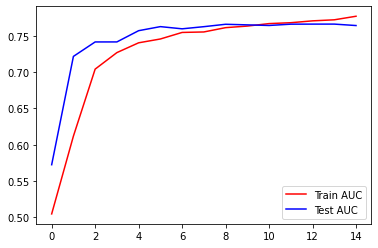

In [ ]:
plt.plot(history.history['auroc'], 'r')
plt.plot(history.history['val_auroc'], 'b')
plt.legend({'Train AUC': 'r', 'Test AUC':'b'})
plt.show()

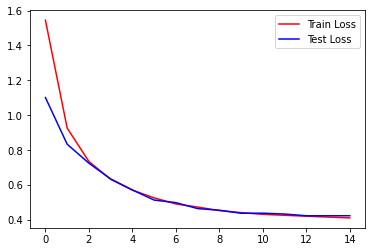

In [ ]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

# Model 2 

In [ ]:
tfidf = TfidfVectorizer()
tfidf_1 = tfidf.fit_transform(X_train["preprocessed_essay"])
dict_wv = dict(zip(tfidf.get_feature_names(),list(tfidf.idf_)))
tfidf_df = pd.DataFrame(list(dict_wv.items()), columns=['Words', 'Values'])
tfidf_df = tfidf_df.sort_values(by ='Values' )

In [ ]:
print("0 - 100 Quantiles:")
print(np.percentile(tfidf_df['Values'],np.arange(0, 100, 25)))

0 - 100 Quantiles:
[ 1.00814034  9.17998468 10.7894226  11.1948877 ]


In [ ]:
print("1th Percentile",np.percentile(tfidf_df['Values'],1))

print("25th Percentiles",np.percentile(tfidf_df['Values'],40))

1th Percentile 3.9633295992861943
25th Percentiles 10.278596972482164


In [ ]:
tfidf_fil = tfidf_df[(tfidf_df["Values"] >=  np.percentile(tfidf_df['Values'],1)) & (tfidf_df["Values"] <=  np.percentile(tfidf_df['Values'],50))]

In [ ]:
fil_words = tfidf_fil["Words"].tolist()

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(fil_words)
seq_train = tokenizer.texts_to_sequences(X_train["preprocessed_essay"])
seq_test = tokenizer.texts_to_sequences(X_test["preprocessed_essay"])

In [ ]:
X_essay_pad_train = pad_sequences(seq_train,maxlen=800,padding='post', truncating='post')
X_essay_pad_test = pad_sequences(seq_test, maxlen=800,padding='post', truncating='post')

In [ ]:
pickle_in = open("/content/drive/My Drive/Donors_choose/Assignments_DonorsChoose_2018/glove_vectors","rb")
glove_words = pickle.load(pickle_in)

In [ ]:
from numpy import zeros
embedding_mat = zeros((len(tokenizer.word_index) + 1, 300))
for word, i in tokenizer.word_index.items():
    vector = glove_words.get(word)
    if vector is not None:
        embedding_mat[i] = vector

In [ ]:
import tensorflow as tf

embedding_layer = Embedding(len(tokenizer.word_index) + 1,300,weights=[embedding_mat],input_length=800,trainable=False)
essay = Input(shape=(800,),name="essay")
x = embedding_layer(essay)
x = LSTM(100,recurrent_dropout=0.5,kernel_regularizer=regularizers.l2(0.001),return_sequences=True)(x)
essay_pre = Flatten()(x)

In [ ]:
x = concatenate([essay_pre,flat_prefix,flat_sc,flat_grade,flat_cat,flat_subcat,numerical_feat])#flat_cat,flat_subcat
x = Dense(128,activation="relu", kernel_initializer="he_normal",kernel_regularizer=regularizers.l2(0.001))(x)
x=Dropout(0.5)(x)
x = Dense(256,activation="relu",kernel_initializer="he_normal",kernel_regularizer=regularizers.l2(0.001))(x)
x=Dropout(0.5)(x)
x = Dense(64,activation="relu", kernel_initializer="he_normal",kernel_regularizer=regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
output = Dense(2, activation='softmax', name='output')(x)
model = Model(inputs=[essay,input_prefix,input_sc,input_grade,input_cat,input_subcat,numerical_feats],outputs=[output])#input_cat,input_subcat,

In [ ]:
train_data = [X_essay_pad_train,enc_prefix_train,enc_sc_train,enc_grade_train,enc_cat_train,enc_subcat_train,X_num_train]#

test_data = [X_essay_pad_test,enc_prefix_test,enc_sc_test,enc_grade_test,enc_cat_test,enc_subcat_test,X_num_test]#enc_cat_test,enc_subcat_test,

In [ ]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, 2) 
Y_test = np_utils.to_categorical(y_test, 2)

In [ ]:
import tensorflow as tf
from sklearn.metrics import roc_auc_score

def auroc(y_true, y_pred):
  try:
    return tf.py_function(roc_auc_score, (y_true, y_pred), tf.double)
  except ValueError:
    pass  

In [ ]:
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=[auroc])

In [48]:
history = model.fit(train_data,Y_train,batch_size=512,
                        epochs=10,validation_data=(test_data,Y_test))

Epoch 1/10
105/105 [==============================] - 1709s 16s/step - loss: 1.5138 - auroc: 0.5618 - val_loss: 1.0385 - val_auroc: 0.6906
Epoch 2/10
105/105 [==============================] - 1720s 16s/step - loss: 0.9078 - auroc: 0.6731 - val_loss: 0.7946 - val_auroc: 0.7103
Epoch 3/10
105/105 [==============================] - 1726s 16s/step - loss: 0.7317 - auroc: 0.7014 - val_loss: 0.6764 - val_auroc: 0.7233
Epoch 4/10
105/105 [==============================] - 1713s 16s/step - loss: 0.6365 - auroc: 0.7125 - val_loss: 0.6065 - val_auroc: 0.7265
Epoch 5/10
105/105 [==============================] - 1709s 16s/step - loss: 0.5739 - auroc: 0.7237 - val_loss: 0.5589 - val_auroc: 0.7253
Epoch 6/10
105/105 [==============================] - 1694s 16s/step - loss: 0.5330 - auroc: 0.7280 - val_loss: 0.5227 - val_auroc: 0.7374
Epoch 7/10
105/105 [==============================] - 1637s 16s/step - loss: 0.5000 - auroc: 0.7320 - val_loss: 0.4997 - val_auroc: 0.7367
Epoch 8/10
105/105 [=======

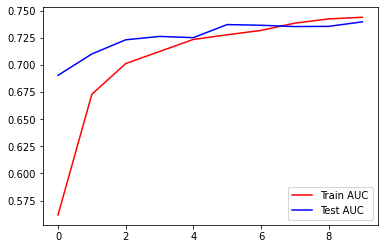

In [49]:
plt.plot(history.history['auroc'], 'r')
plt.plot(history.history['val_auroc'], 'b')
plt.legend({'Train AUC': 'r', 'Test AUC':'b'})
plt.show()

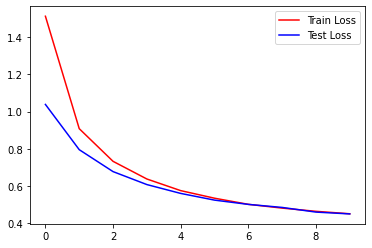

In [50]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

### 1. Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
### 2. Please go through this link https://keras.io/getting-started/functional-api-guide/ and check the 'Multi-input and multi-output models' then you will get to know how to give multiple inputs. 

### Model-3

<img src='https://i.imgur.com/fkQ8nGo.png'>
ref: https://i.imgur.com/fkQ8nGo.png


- __input_seq_total_text_data__: <br>
<pre>
    . Use text column('essay'), and use the Embedding layer to get word vectors. <br>
    . Use given predefined glove word vectors, don't train any word vectors. <br>
    . Use LSTM that is given above, get the LSTM output and Flatten that output. <br>
    . You are free to preprocess the input text as you needed. <br>
</pre>
- __Other_than_text_data__:<br>
<pre>
    . Convert all your Categorical values to onehot coded and then concatenate all these onehot vectors <br>
    . Neumerical values and use <a href='https://keras.io/getting-started/sequential-model-guide/#sequence-classification-with-1d-convolutions'>CNN1D</a> as shown in above figure. <br>
    . You are free to choose all CNN parameters like kernel sizes, stride.<br>
    
</pre>

In [75]:
tfidf = TfidfVectorizer()
tfidf_1 = tfidf.fit_transform(X_train["preprocessed_essay"])
dict_wv = dict(zip(tfidf.get_feature_names(),list(tfidf.idf_)))
tfidf_df = pd.DataFrame(list(dict_wv.items()), columns=['Words', 'Values'])
tfidf_df = tfidf_df.sort_values(by ='Values' )

In [76]:
tfidf_fil = tfidf_df[(tfidf_df["Values"] >=  np.percentile(tfidf_df['Values'],1)) & (tfidf_df["Values"] <=  np.percentile(tfidf_df['Values'],50))]

In [77]:
fil_words = tfidf_fil["Words"].tolist()

In [78]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(fil_words)
seq_train = tokenizer.texts_to_sequences(X_train["preprocessed_essay"])
seq_test = tokenizer.texts_to_sequences(X_test["preprocessed_essay"])

In [79]:
X_essay_pad_train = pad_sequences(seq_train,maxlen=100)
X_essay_pad_test = pad_sequences(seq_test, maxlen=100)

In [80]:
pickle_in = open("/content/drive/My Drive/Donors_choose/Assignments_DonorsChoose_2018/glove_vectors","rb")
glove_words = pickle.load(pickle_in)

In [81]:

from numpy import zeros
embedding_mat = zeros((len(tokenizer.word_index) + 1, 300))
for word, i in tokenizer.word_index.items():
    vector = glove_words.get(word)
    if vector is not None:
        embedding_mat[i] = vector

In [58]:
print(embedding_mat.shape)

(25819, 300)


In [82]:
import tensorflow as tf

embedding_layer = Embedding(len(tokenizer.word_index) + 1,300,weights=[embedding_mat],input_length=100,trainable=False)
essay = Input(shape=(100,),name="essay")
x = embedding_layer(essay)
x = LSTM(100,recurrent_dropout=0.5,kernel_regularizer=regularizers.l2(0.001),return_sequences=True)(x)
essay_pre = Flatten()(x)	

In [83]:
essay_pre.shape

TensorShape([None, 10000])

In [84]:
vect = CountVectorizer(binary=True)
vect.fit(X_train["clean_teacher_prefix"])
X_train_prefix = vect.transform(X_train["clean_teacher_prefix"])
X_test_prefix = vect.transform(X_test["clean_teacher_prefix"])

In [85]:
vect = CountVectorizer(binary=True)
vect.fit(X_train["clean_project_grade_category"])
X_train_grade = vect.transform(X_train["clean_project_grade_category"])
X_test_grade = vect.transform(X_test["clean_project_grade_category"])

In [86]:
vect = CountVectorizer(binary=True)
vect.fit(X_train["clean_school_state"])
X_train_state = vect.transform(X_train["clean_school_state"])
X_test_state = vect.transform(X_test["clean_school_state"])

In [87]:
vect = CountVectorizer(binary=True)
vect.fit(X_train["clean_categories"])
X_train_cat = vect.transform(X_train["clean_categories"])
X_test_cat = vect.transform(X_test["clean_categories"])

In [88]:
vect = CountVectorizer(binary=True)
vect.fit(X_train["clean_subcategories"])
X_train_subcat = vect.transform(X_train["clean_subcategories"])
X_test_subcat = vect.transform(X_test["clean_subcategories"])

In [89]:
price_train=X_train['price'].values.reshape(-1, 1)
quantity_train=X_train['quantity'].values.reshape(-1, 1)
projects_train=X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1)
price_test=X_test['price'].values.reshape(-1, 1)
quantity_test=X_test['quantity'].values.reshape(-1, 1)
projects_test=X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1)
X_num_train=np.concatenate((price_train,quantity_train,projects_train),axis=1)
X_num_test=np.concatenate((price_test,quantity_test,projects_test),axis=1)

from sklearn.preprocessing import StandardScaler
normal=StandardScaler()
X_num_train=normal.fit_transform(X_num_train)
X_num_test=normal.transform(X_num_test)

In [90]:
from scipy.sparse import hstack
X_cat_train = hstack([X_train_prefix,X_train_state,X_train_grade,X_train_cat,X_train_subcat]).todense()
X_cat_test = hstack([X_test_prefix,X_test_state,X_test_grade,X_test_cat,X_test_subcat]).todense()
X_con_train = np.hstack((X_cat_train,X_num_train))
X_con_test = np.hstack((X_cat_test,X_num_test))
X_train_non_text = np.expand_dims(X_con_train,2)
X_test_non_text = np.expand_dims(X_con_test,2)

In [97]:
conv=Input(shape=(103, 1))
C1 = Conv1D(filters=128, kernel_size=3, activation='relu',kernel_initializer="he_normal")(conv)
C1 = Conv1D(filters=128, kernel_size=3, activation='relu',kernel_initializer="he_normal")(C1)
C1 = Flatten()(C1)

In [98]:
x_concatenate = concatenate([essay_pre,C1])
x = Dense(128,activation="relu",kernel_initializer="he_normal",kernel_regularizer=regularizers.l2(0.001))(x_concatenate)
x=Dropout(0.5)(x)
x = Dense(64,activation="relu",kernel_initializer="he_normal",kernel_regularizer=regularizers.l2(0.001))(x)
x=Dropout(0.2)(x)
x = Dense(32,activation="relu",kernel_initializer="he_normal",kernel_regularizer=regularizers.l2(0.001))(x)
output = Dense(2, activation='softmax', name='output')(x)
model = Model(inputs=[essay,conv],outputs=[output])

In [99]:
train_data = [X_essay_pad_train,X_train_non_text]
test_data = [X_essay_pad_test,X_test_non_text]
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, 2) 
Y_test = np_utils.to_categorical(y_test, 2)

In [100]:
import tensorflow as tf
from sklearn.metrics import roc_auc_score
def auc1(y_true, y_pred):
    if len(np.unique(y_true[:,1])) == 1:
        return 0.5
    else:
        return roc_auc_score(y_true, y_pred)
def auroc(y_true, y_pred):
    return tf.py_function(auc1, (y_true, y_pred), tf.double)

In [101]:
checkpoint_3 = ModelCheckpoint("model_3.h5",monitor="val_auroc",mode="max",save_best_only = True,verbose=1)
NAME = 'model_3'
tensorboard_2 = TensorBoard(log_dir='logss\{}'.format(NAME),update_freq='epoch',batch_size=512)
callbacks_2 = [tensorboard_2,checkpoint_3]

In [102]:
model.compile(optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999,), loss='categorical_crossentropy', metrics=[auroc])

In [103]:
history = model.fit(train_data,Y_train,batch_size=512,epochs=10,validation_data=(test_data,Y_test),verbose=1,callbacks=callbacks_2)

Epoch 1/10
  1/105 [..............................] - ETA: 0s - loss: 1.6264 - auroc: 0.4854WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
105/105 [==============================] - ETA: 0s - loss: 0.8323 - auroc: 0.6547
Epoch 00001: val_auroc improved from -inf to 0.73252, saving model to model_3.h5
105/105 [==============================] - 254s 2s/step - loss: 0.8323 - auroc: 0.6547 - val_loss: 0.6216 - val_auroc: 0.7325
Epoch 2/10
105/105 [==============================] - ETA: 0s - loss: 0.5456 - auroc: 0.7177
Epoch 00002: val_auroc improved from 0.73252 to 0.73479, saving model to model_3.h5
105/105 [==============================] - 262s 2s/step - loss: 0.5456 - auroc: 0.7177 - val_loss: 0.5122 - val_auroc: 0.7348
Epoch 3/10
105/105 [==================

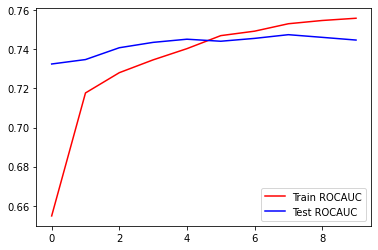

In [104]:
plt.plot(history.history['auroc'], 'r')
plt.plot(history.history['val_auroc'], 'b')
plt.legend({'Train ROCAUC': 'r', 'Test ROCAUC':'b'})
plt.show()

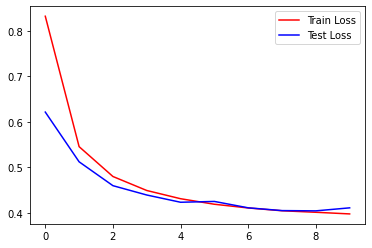

In [105]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

# Summary

In [107]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "Test loss", "Test AUC"]
x.add_row(["1","0.4227", "0.7649"])
x.add_row(["2","0.4483", "0.7399"])
x.add_row(["3","0.411", "0.7448"])
print(x)

+-------+-----------+----------+
| Model | Test loss | Test AUC |
+-------+-----------+----------+
|   1   |   0.4227  |  0.7649  |
|   2   |   0.4483  |  0.7399  |
|   3   |   0.411   |  0.7448  |
+-------+-----------+----------+
